# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Elfira Maya Shofwah
- **Email:** elfiramaya253@gmail.com
- **ID Dicoding:** elfira_maya_7BmS
- **Data**: [Bike Sharing Dataset Kaggle](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset)

## Menentukan Pertanyaan Bisnis

- Pada musim apa sepeda paling banyak disewa?
- Apakah terdapat pengaruh temprature terhadap penyewaan sepeda?
- Bagaimana perbandingan antara jumlah pelanggan biasa dengan pelanggan yang terdaftar?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Wrangling

**Data wrangling** adalah sebuah proses atau kumpulan kegiatan yang meliputi pengumpulan data (Gathering data), penilaian data (Assessing data), serta pembersihan data (Cleaning data) sebelum data digunakan dalam proses analisis data. Mengumpulkan data yang dibutuhkan untuk menjawab pertanyaan analisis yang telah dibuat sebelumnya.

### Gathering Data

Pada proses ini kita akan mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah bisnis yang ingin kita hadapi.

In [39]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Import data day_df
day_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/day.csv",delimiter=",")
day_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Dalam data wrangling tahap pertama yang dilakukan adalah gathering data, dimana pada kondisi ini dilakukan import data day yang diinisialisasi sebagai variabel day_df dan kemudian ditampilkan 5 baris data pertama

### Assessing Data

Proses ini dilakukan untuk menilai kualitas dan struktur dari sebuah data. Selain itu, proses ini juga bertujuan untuk mengidentifikasi berbagai masalah yang terdapat dalam data, seperti missing value, unstandard value, dll.

In [ ]:
# Informasi data dari setiap kolom
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
# Memeriksa missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat diketahui bahwa tidak terdapat missing value atau sel dengan data yang kosong

In [ ]:
# Memeriksa data duplicate
day_df.duplicated().sum()
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Dapat diketahui bahwa tidak ada data yang duplikat di dalam sel

In [ ]:
# Memeriksa Outlier Kolom CNT
q25, q75 = np.percentile(day_df['cnt'], 25), np.percentile(day_df['cnt'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off
outliers_cnt = [x for x in day_df['cnt'] if x < minimum or x > maximum]
print("Outlier Kolom Count: ",outliers_cnt)

Outlier Kolom Count:  []


Dapat diketahui bahwa kolom 'cnt' tidak memiliki data outlier

In [ ]:
# Memeriksa Outlier Kolom Season
q25, q75 = np.percentile(day_df['season'], 25), np.percentile(day_df['season'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off
outliers_ss = [x for x in day_df['season'] if x < minimum or x > maximum]
print("Outlier Kolom Season: ",outliers_ss)

Outlier Kolom Season:  []


Dapat diketahui bahwa kolom 'season' tidak memiliki data outlier

Tahap kedua dalam Data Wrangling ialah Assessing Data. Pada pengecekan missing value dari tabel day diketahui bahwa tidak ada sel yang memiliki data kosong, berdasarkan pemeriksaan duplikat juga tidak ditemui adanya data duplikat dalam sebuah sel. Dari kolom-kolom yang akan digunakan pada tabel ini juga diketahui bahwa tidak ada data outlier pada keduanya.

### Cleaning Data

Berdasarkan tahapan yang telah dilakukan sebelumnya, yakni Assessing data sebenarnya diketahui bahwa data telah siap digunakan. Namun untuk mengantisipasi kesalahan akibat human error maka dilakukan cleaning data berupa mengatasi missing value, mengatasi outlier, dan mengatasi data duplikat. Selain itu juga dilakukan perubahan value pada data kategori

In [ ]:
import pandas as pd

# Mengatasi Missing Value dengan Imputation
day_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/day.csv",delimiter=",")
print(day_df.cnt.fillna(value=day_df.cnt.mean(), inplace=True))

None


In [ ]:
# Mengatasi Outlier dengan Drop
Q1 = (day_df['cnt']).quantile(0.25)
Q3 = (day_df['cnt']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

kondisi_lower_than = day_df['cnt'] < minimum
kondisi_more_than = day_df['cnt'] > maximum

print(day_df.drop(day_df[kondisi_lower_than].index, inplace=True))
print(day_df.drop(day_df[kondisi_more_than].index, inplace=True))

None
None


In [ ]:
# Mengatasi Duplicate Data
print(day_df.drop_duplicates(inplace=True))

None


In [40]:
# Mengubah 0: 2011 dan 1: 2012
import pandas as pd
day_df.yr.replace(to_replace = (0,1), value = ('2011','2012'), inplace = True)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Melakukan perubahan pada data kolom 'yr' dimana sel dengan nilai '0' akan diganti dengan '2011' dan kolom dengan nilai '1' diganti dengan '2012'

In [41]:
# Mengubah data kategori musim
# {1: musim semi}, {2: musim panas}, {3: musim gugur}, dan {4: musim dingin}
import pandas as pd

day_df['season'].replace([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'], inplace=True)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Melakukan perubahan nilai pada data kolom 'season' dimana {1: musim semi}, {2: musim panas}, {3: musim gugur}, dan {4: musim dingin}

In [42]:
# Mengubah data kategori bulan
day_df['mnth'].replace(
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    inplace=True)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Melakukan perubahan data pada kolom 'mnth' dimana kolom dengan nilai '1' akan diganti dengan January, '2' diganti dengan February, dan seterusnya hingga December

## Exploratory Data Analysis (EDA)

Proses analisis data yang bertujuan untuk mengeksplorasi dan mengenal sebuah data. Pada prosesnya sering kali mulai dengan mendefinisikan berbagai pertanyaan atau hanya menggali data guna menemukan beberapa insight yang menarik dari sebuah data.

### Explore ...

<Axes: >

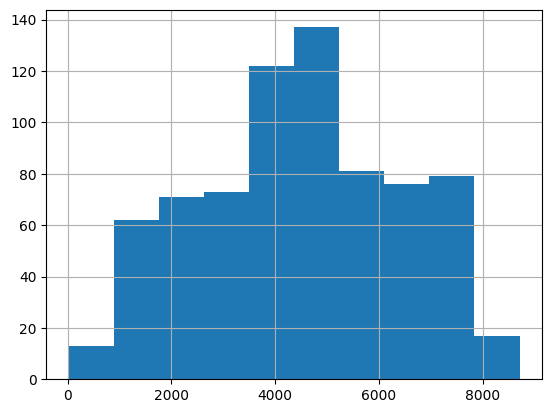

In [ ]:
import pandas as pd
import seaborn as sns

day_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/day.csv",delimiter=",")

# Memeriksa bentuk sebaran data melalui histogram
day_df['cnt'].hist()

Dilakukan pengujian terhadap normalitas data menggunakan histogram, diketahui bahwa sebaran data dari kolom 'cnt' yang berupa data total sepeda yang dipinjam menyebar dengan sebaran normal. Data diketahui berdistribusi normal dari bentuk sebaran yang simetris dan berada memusat di tengah. Pengujian ini perlu dilakukan untuk memenuhi asumsi sebelum melakukan uji regresi linear.

In [ ]:
# Membuat Pivot Table
season_grouped = day_df.groupby('season')['cnt'].agg(['sum', 'mean', 'max', 'min'])
print(season_grouped)

            sum         mean   max   min
season                                  
1        471348  2604.132597  7836   431
2        918589  4992.331522  8362   795
3       1061129  5644.303191  8714  1115
4        841613  4728.162921  8555    22


Berdasarkan tabel pivot yang terbentuk dapat diketahui bahwa penyewaan sepeda tertinggi sepanjang tahun 2011 - 2012 terjadi pada musim gugur. Rata-rata penyewaan sepeda pada musim gugur mencapai sekitar 5644 sepeda per tahunnya. Sementara itu, rata-rata penyewaan paling sedikit terjadi pada musim semi dimana per tahunnya hanya mencapai sekitar 2504 sepeda per tahunnya.

In [ ]:
# Melihat Rangkuman Parameter Statistik
day_df.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


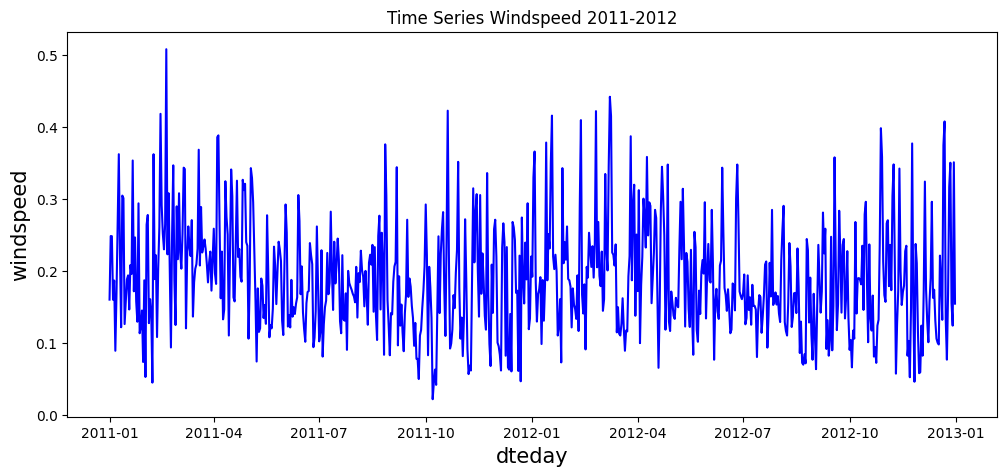

In [ ]:
# Line chart kecepatan angin
day_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/day.csv",delimiter=",")
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

plt.figure(figsize = (12,5))
plt.plot(day_df['dteday'], day_df['windspeed'], color = 'blue')
plt.title('Data Kecepatan Angin 2011-2012')
plt.xlabel('dteday', size = 15)
plt.ylabel('windspeed', size = 15)
plt.show()

Diketahui bahwa kecepatan angin sepanjang tahun 2011 - 2012 memiliki pola musiman yang cukup stasioner. Hal ini dapat dilihat dari bentuk grafik yang memiliki pola berulang setiap tanggal 1 Januari

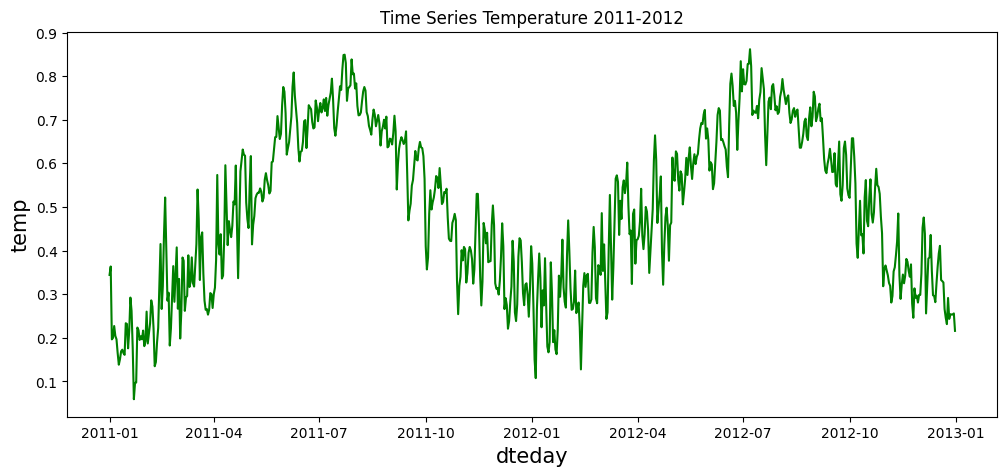

In [ ]:
# Line chart temperature
day_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/day.csv",delimiter=",")
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

plt.figure(figsize = (12,5))
plt.plot(day_df['dteday'], day_df['temp'], color = 'green')
plt.title('Data Temperatur 2011-2012')
plt.xlabel('dteday', size = 15)
plt.ylabel('temp', size = 15)
plt.show()

Diketahui bahwa temperatur sepanjang tahun 2011 - 2012 memiliki pola musiman. Hal ini dapat dilihat dari bentuk grafik yang memiliki pola berulang setiap tanggal 1 Januari

## Visualization & Explanatory Analysis

Visualisasi data merupakan cara kita dalam menyajikan data dalam bentuk visual

### Pertanyaan 1: Pada musim apa sepeda paling banyak dipinjam?

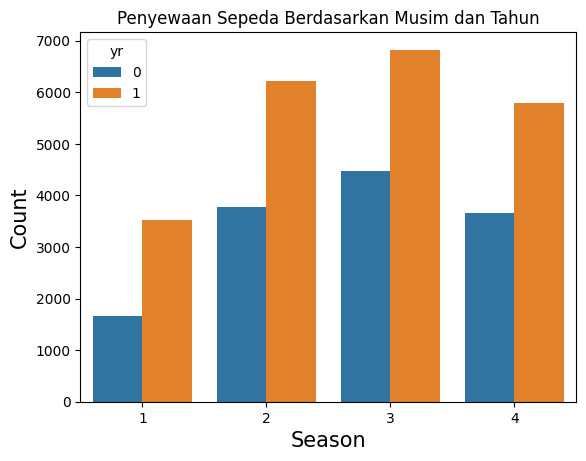

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Mengubah data kategori musim
day_df['season'].replace([1, 2, 3, 4], ['Spring', 'Summer', 'Fall', 'Winter'], inplace=True)

# Visualisasi dengan bar chart
day_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/day.csv",delimiter=",")
sns.barplot(data=day_df, x="season", y="cnt", hue="yr", errorbar=None)
plt.title('Penyewaan Sepeda Berdasarkan Musim dan Tahun')
plt.xlabel('Season', size = 15)
plt.ylabel('Count', size = 15)
plt.show()

Sebelumnya diketahui "year = 0" mewakili data sepanjang tahun 2011 dan "year = 1" mewakili data sepanjang tahun 2012. Season yang diwakili dengan {1: musim semi}, {2: musim panas}, {3: musim gugur}, dan {4: musim dingin} Dapat diketahui berdasarkan peminjaman sepeda pada tahun 2011, penyewaan sepeda terbanyak berada di musim gugur, sedangkan penyewaan sepeda paling sedikit terdapat pada musim semi.

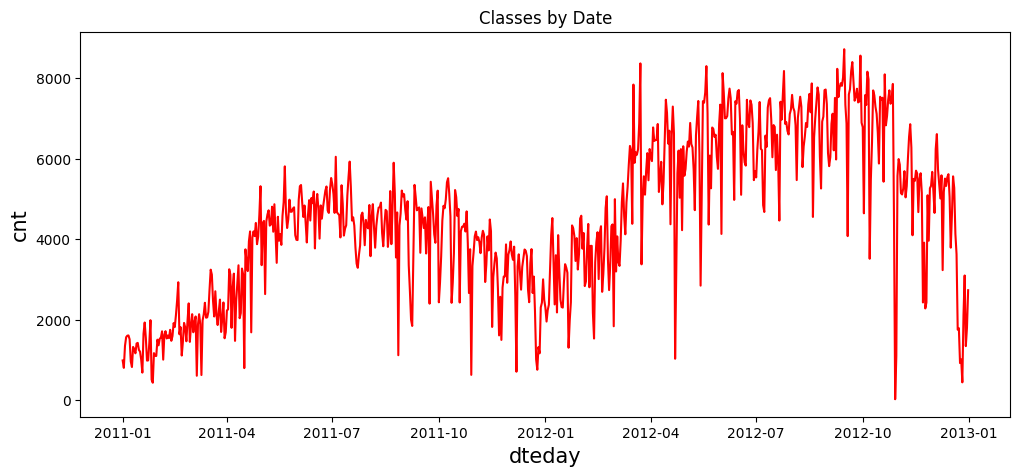

In [ ]:
# Visualisasi data dengan line chart
day_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/day.csv",delimiter=",")
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

plt.figure(figsize = (12,5))
plt.plot(day_df['dteday'], day_df['cnt'], color = 'red')
plt.title('Classes by Date')
plt.xlabel('dteday', size = 15)
plt.ylabel('cnt', size = 15)
plt.show()

Berdasarkan line chart dapat dilihat adanya pola atau siklus yang berulang dalam 1 tahun di tahun berikutnya. Hal ini dapat dilihat pada bulan Januari, line chart berada di titik rendah kemudian perlahan naik hingga bulan Agustus dan kembali menurun ketika menuju Desember. Pola ini dapat dikatakan pola musiman yang diiringi oleh tren naik.

### Pertanyaan 2: Apakah ada faktor-faktor yang mempengaruhi penyewaan sepeda?

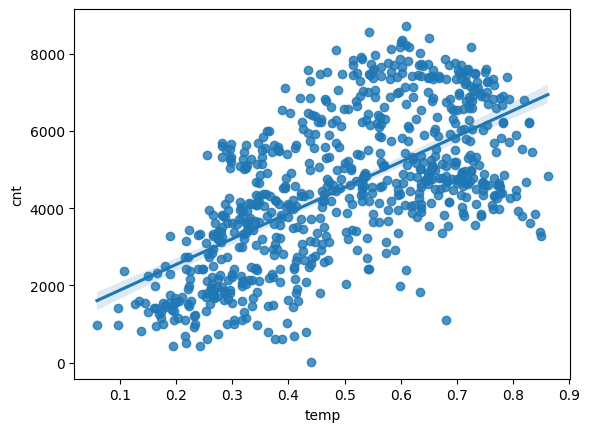

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Mengetahui pengaruh suhu terhadap jumlah penyewaan sepeda
day_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/day.csv",delimiter=",")
sns.regplot(x = day_df['temp'], y = day_df['cnt'])
plt.show()

In [ ]:
# Mencari hubungan antara temperature dengan jumlah penyewaan sepeda
r = np.corrcoef(x = day_df['temp'], y = day_df['cnt'])
r

array([[1.        , 0.62749401],
       [0.62749401, 1.        ]])

Berdasarkan plot regresi yang terbentuk di atas, titik yang diplot tersebar secara acak dan berbentuk menyerupai garis lurus sehingga dapat diketahui bahwa terdapat pengaruh dari temperatur terhadap banyak sepeda yang dirental per harinya. Selain itu, berdasarkan korelasi diketahui bahwa kedua variabel berkorelasi kuat positif sebesar 0,6275. Artinya semakin tinggi temperatur maka semakin banyak pula sepeda yang disewa

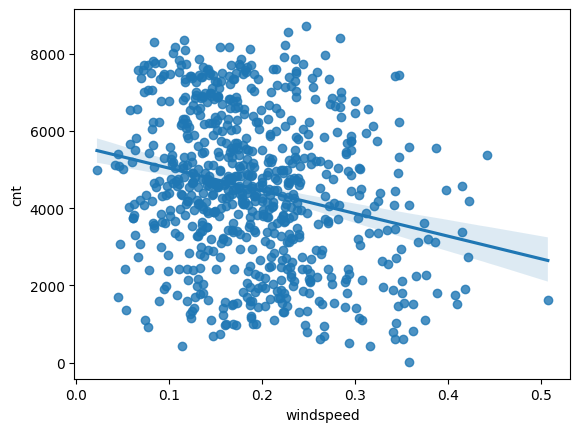

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Mengetahui pengaruh kecepatan angin terhadap jumlah penyewaan sepeda
day_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/day.csv",delimiter=",")
sns.regplot(x = day_df['windspeed'], y = day_df['cnt'])
plt.show()

In [ ]:
# Mencari hubungan antara kecepatan angin dengan jumlah penyewaan sepeda
p = np.corrcoef(x = day_df['windspeed'], y = day_df['cnt'])
p

array([[ 1.      , -0.234545],
       [-0.234545,  1.      ]])

Berdasarkan plot regresi yang terbentuk di atas, titik yang diplot tersebar secara acak dan tidak berbentuk menyerupai garis lurus sehingga dapat diketahui bahwa tidak terdapat pengaruh dari kecepatan angin terhadap banyak sepeda yang disewa per harinya. Selain itu, berdasarkan korelasi diketahui bahwa kedua variabel berkorelasi lemah negatif sebesar -0,235. Artinya semakin rendah kecepatan angin maka semakin banyak sepeda yang disewa dan semakin tinggi kecepatan angin maka semakin dikit sepeda yang disewa.

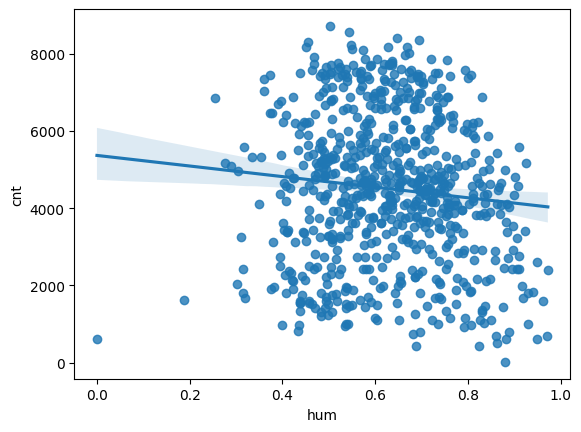

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Mengetahui pengaruh kelembapan terhadap jumlah penyewaan sepeda
day_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/day.csv",delimiter=",")
sns.regplot(x = day_df['hum'], y = day_df['cnt'])
plt.show()

In [ ]:
# Mencari hubungan antara kecepatan angin dengan jumlah penyewaan sepeda
q = np.corrcoef(x = day_df['hum'], y = day_df['cnt'])
q

array([[ 1.        , -0.10065856],
       [-0.10065856,  1.        ]])

Berdasarkan plot regresi yang terbentuk di atas, titik yang diplot tersebar secara acak dan tidak berbentuk menyerupai garis lurus sehingga dapat diketahui bahwa tidak terdapat pengaruh dari kelembapan terhadap banyak sepeda yang dirental per harinya. Selain itu, berdasarkan korelasi diketahui bahwa kedua variabel berkorelasi lemah negatif sebesar -0,1007. Artinya semakin rendah kelembapan maka semakin banyak sepeda yang disewa dan semakin tinggi kelembapan maka semakin dikit sepeda yang disewa.



### Pertanyaan 3: Bagaimana perbandingan antara jumlah pelanggan biasa dengan pelanggan yang terdaftar?



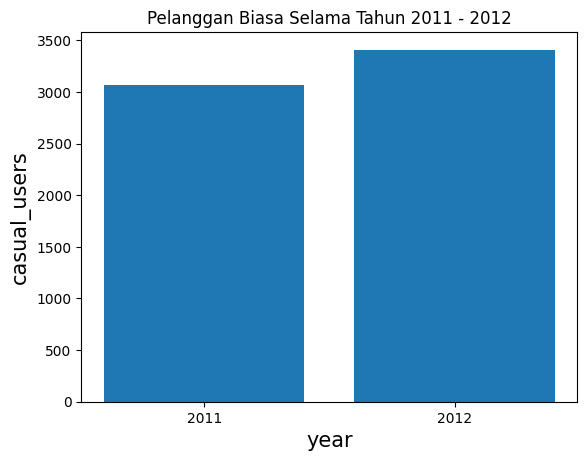

In [32]:
import pandas as pd
day_df.yr.replace(to_replace = (0,1), value = ('2011','2012'), inplace = True)

# Mengetahui banyak pelanggan biasa yang menyewa sepeda pada tahun 2011 - 2012
year = day_df['yr']
casual_users = day_df['casual']
day_df.sort_values(by = 'yr', inplace = True)
plt.bar(x = year , height = casual_users )
plt.title('Pelanggan Biasa Selama Tahun 2011 - 2012')
plt.xlabel('year', size = 15)
plt.ylabel('casual_users', size = 15)
plt.show()

Berdasarkan bar chart di atas dapat diketahui bahwa pengguna biasa mengalami kenaikan pada tahun 2012

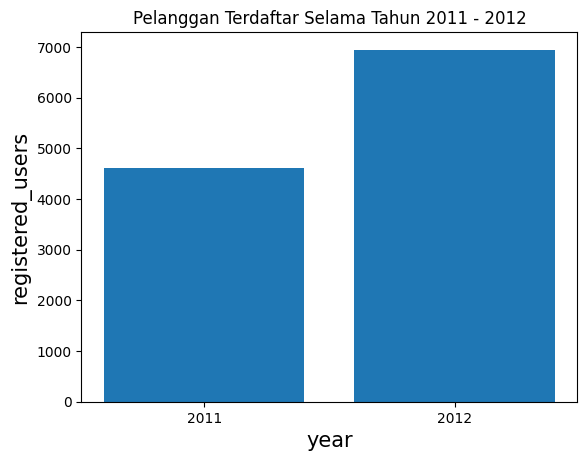

In [33]:
import pandas as pd
day_df.yr.replace(to_replace = (0,1), value = ('2011','2012'), inplace = True)

# Mengetahui banyak pelanggan terdaftar yang menyewa sepeda pada tahun 2011 - 2012
year = day_df['yr']
registered_users = day_df['registered']
day_df.sort_values(by = 'yr', inplace = True)
plt.bar(x = year , height = registered_users )
plt.title('Pelanggan Terdaftar Selama Tahun 2011 - 2012')
plt.xlabel('year', size = 15)
plt.ylabel('registered_users', size = 15)
plt.show()

Berdasarkan bar chart di atas dapat diketahui bahwa pengguna terdaftar mengalami kenaikan yang cukup besar pada tahun 2012

In [57]:
# Menghitung jumlah pengguna biasa dan pengguna terdaftar
day_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/day.csv",delimiter=",")

# Menghitung mean dari kolom 'casual'
mean_casual = day_df['casual'].mean()
print(mean_casual)
# Menghitung mean dari kolom 'casual'
mean_regis = day_df['registered'].mean()
print(mean_regis)

848.1764705882352
3656.172366621067


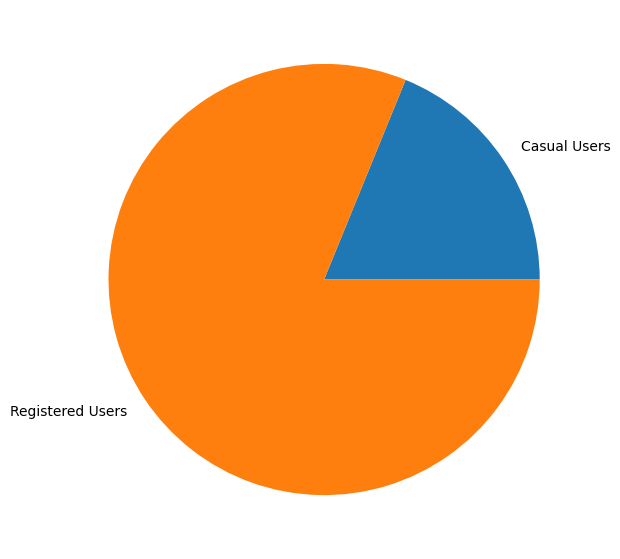

In [58]:
# Mengetahui perbandingan antara
# jumlah pelanggan biasa dan jumlah pelanggan terdaftar

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

day_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/day.csv",delimiter=",")

users = ['Casual Users', 'Registered Users']
data = [848.1764705882352, 3656.172366621067]
fig = plt.figure(figsize=(10, 7))
plt.pie(data, labels=users)

# show plot
plt.show()


Berdasarkan pie chart yang terbentuk, dapat diketahui bahwa rata-rata registered users yang menyewa sepeda selama tahun 2011 - 2012 lebih banyak dibanding casual users

## Conclusion

- Diketahui penyewaan sepeda paling banyak dilakukan pada setiap musim gugur baik di tahun 2011 dan 2012. Rata-rata penyewaan sepeda pada musim gugur mencapai sekitar 5644 sepeda per tahunnya. Banyaknya sepeda yang disewa pada musim gugur tahun 2011 mengalami kenaikan pada musim gugur tahun 2012, pola ini dapat dianggap musiman dan tren naik.
- Diketahui bahwa temperatur mempengaruhi secara signifikan jumlah sepeda yang disewa per harinya. Dimana terdapat hubungan yang cukup kuat antara temperatur lingkungan terhadap penyewaan sepeda, kenaikan suhu akan meningkatkan kenaikan penyewaan sepeda.
- Dapat disimpulkan rata-rata sepeda yang disewa oleh pengguna terdaftar lebih banyak dibandingkan dengan rata-rata sepeda yang disewa oleh pengguna biasa. Terdapat pula kenaikan rata rata pengguna terdaftar pada tahun 2012 dari tahun 2011